Pada tugas kali ini data yang dipilih merupakan data adult yang diambil dari UCI. Data ini terdiri dari 14 atributes dan 48.842 rows.

Task kita adalah untuk melakukan mining data sebanyak-banyaknya untuk dataset tersebut

## Explorasi Data 

#### List Atributes 
1. age : Continous 
2. workclass : Kategorik (7 Kategori)
    a. Private
    b. Self-emp-not-inc
    c. Self-emp-inc
    d. Federal-gov
    e. Local-gov
    f. State-gov
    g. Without-pay
    h. Never-worked
3. fnlwgt : Continuous
4. education : Kategorik (15 Kategori)
    a. Bachelors
    b. Some-college
    c. 11th
    d. HS-grad
    e. Prof-school
    f. Assoc-acdm
    g. Assoc-voc
    h. 9th
    i. 7th-8th
    j. 12th 
    k. Masters
    l. 1st-4th
    m. Doctorate 
    n. 5th-6th
    o. Preschool
5. education-num : Continuous
6. marital-status : Kategorik(7 Kategori)
    a. Married-civ-spouse
    b. Divorced 
    c. Never-married
    d. Separated 
    e. Widowed
    f. Married-spouse-absent
    g. Married-AF-spouse
7. occupation : Kategorik(11 Kategori)
    a. Tech-support 
    b. Craft-repair
    c. Other-service
    d. Sales
    e. Exec-managerial 
    f. Prof-speciality
    g. Handlers-cleaners
    h. Machine-op-inspct
    i. Adm-clerical
    j. Farming-fishing
    h. Transport-moving
    i. Priv-house-serv
    j. Protective-serv
    k. Armed-Forces
8. relationship: Kategori(7 Kategori)
    a. Wife
    b. Own-child
    c. Husband
    d. Not-in-family
    e. Other-relative
    f. Unmarried
9. Race : Kategori 
    a. White 
    b. Asian-Pac-Islander
    c. Amer-Indian-Eskimo
    e. Other 
    f. Black 
10. Sex 
    a. Male 
    b. Female 
11. Capital-gain : continuous
12. Capital-loss : continuous
13. hours-per-week : 
14. Native-Country : Kategori (28 Kategori)
    a. United-States
    b. Cambodia
    c. Puerto-Rico
    d. Canada
    e. Germany
    f. Outlying-US (Guam-USVI-etc)
    g. India
    h. Japan 
    i. Greece 
    j. South
    k. China 
    l. Cuba 
    m. Iran
    n. Honduras
    o. Philipines 
    p. Italy
    q. Poland 
    r. Jamaica 
    s. Vietnam
    t. Guatemala 
    u. Nicaragua 
    v. Scotland
    w. Thailand
    x. Yugoslavia
    y. El-savador
    z. Trinidad & Tobago
    aa. Peru
    ab. Hong
    ac. Holand-Netherlands 

Dan satu variabel terakhir merupakan variabel income yang diklasfikasi berdasarkan 2 kategori, yaitu income lebih kecil sama dengan 50K per tahun dan income lebih besar dari 50K per tahun

In [122]:
from IPython.display import display
from numpy.random import RandomState
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn_pandas import DataFrameMapper

import numpy as np
import pandas as pd

In [93]:
df = pd.read_csv("adult/adult.data.csv", header=None)

In [94]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Kita berikan nama kolom sesuai variabel untuk mempermudah membaca data

In [95]:
df.columns = [
    "age", "workClass", "fnlwgt", "education", "educationNum",
    "maritalStatus", "occupation", "relationship", "race", "gender",
    "capitalGain", "capitalLoss", "hoursPerWeek", "nativeCountry", "Income"
]

In [96]:
df.head()

,age,workClass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,gender,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


cek missing value 

In [97]:
df.isnull().any().any()

False

karena di data tersebut terdapat data numerik, yaitu variabel age, fnlwgt, educationNum, capitalGain, capitalLoss  maka kita kita dapat melakukan deskripsi secara statistik 

In [98]:
df.describe()

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [99]:
import matplotlib.pyplot as plt

In [100]:
age_grouped = df.groupby('age')

age
17    AxesSubplot(0.125,0.125;0.775x0.755)
18    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
21    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
23    AxesSubplot(0.125,0.125;0.775x0.755)
24    AxesSubplot(0.125,0.125;0.775x0.755)
25    AxesSubplot(0.125,0.125;0.775x0.755)
26    AxesSubplot(0.125,0.125;0.775x0.755)
27    AxesSubplot(0.125,0.125;0.775x0.755)
28    AxesSubplot(0.125,0.125;0.775x0.755)
29    AxesSubplot(0.125,0.125;0.775x0.755)
30    AxesSubplot(0.125,0.125;0.775x0.755)
31    AxesSubplot(0.125,0.125;0.775x0.755)
32    AxesSubplot(0.125,0.125;0.775x0.755)
33    AxesSubplot(0.125,0.125;0.775x0.755)
34    AxesSubplot(0.125,0.125;0.775x0.755)
35    AxesSubplot(0.125,0.125;0.775x0.755)
36    AxesSubplot(0.125,0.125;0.775x0.755)
37    AxesSubplot(0.125,0.125;0.775x0.755)
38    AxesSubplot(0.125,0.125;0.775x0.755)
39    AxesSubplot(0.125,0.125;0.775x0.755)
40    A

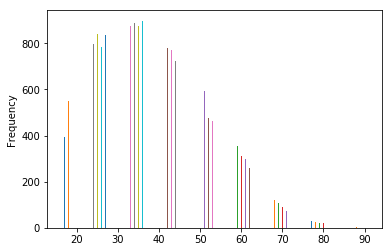

In [101]:
age_grouped['age'].plot.hist()

Dapat kita lihat bahwa berdasarkan kelompok umur, distribusi sampel yang diambil ini cenderung menceng ke kanan. Dengan kurva yang menceng kanan dapat juga dikatakan bahwa modus<median<mean. Dari fungsi describe juga dapat kita ketahui bahwa sampel yang diambil memiliki umur terendah 17 tahun sampai yang tertua 90 tahun. Jika dirata-ratakan, usia data sampel memiliki rata-rata 38.58 tahun dengan standar deviasi 13.64. Artinya, data-data yang ada menunjukkan bahwa data memiliki jarak dengan nilai mean yang cukup besar (cukup bervariasi). Namun demikian tampaknya responden dengan kelompok usia 25-45 cenderung yang mendominasi dari jumlah sampel yang ada.  

In [102]:
df.head()

,age,workClass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,gender,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Text(0.5,1,'Sampel Percentage By Gender')

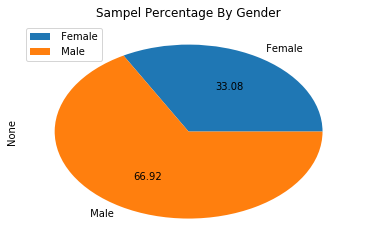

In [103]:
gender = df.groupby('gender').size()
gender.plot.pie(autopct='%.2f',legend=True).set_title('Sampel Percentage By Gender')

Data sampel terdiri dari 66.92 persen laki-laki dan 33.08 persen perempuan

Text(0.5,1,'Sampel Percentage By Education')

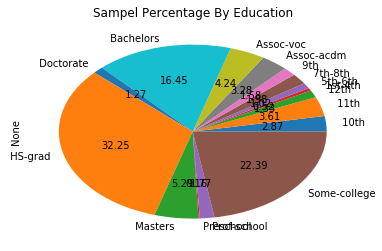

In [104]:
edu = df.groupby('education').size()
edu.plot.pie(autopct='%.2f',legend=False).set_title('Sampel Percentage By Education')

In [105]:
dominanedu = 32.25+22.39+16.45
print(dominanedu)
print(100-dominanedu)

71.09
28.909999999999997


Tingkat pendidikan data sampel sebanyak 71.09 didominasi oleh lulusan HS-grad, Some-college, dan Bachelors terdiri dari 32.25 persen lulusan HS-grad, 22.39 persen lulusan Some-college, dan 16.45 persen Bachelors. Tingkat pendidikan lainnya hanya memiliki persentase sebesar 28.90 persen

Text(0.5,1,'Sampel Percentage By Gender')

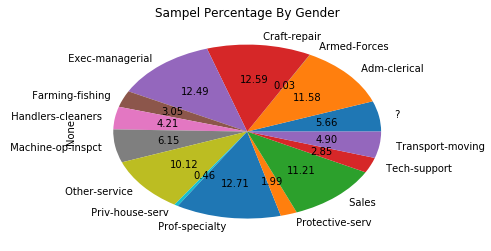

In [106]:
occupa = df.groupby('occupation').size()
occupa.plot.pie(autopct='%.2f',legend=False).set_title('Sampel Percentage By Gender')

In [107]:
dominanoccupa = 12.71+12.49+12.59+11.58
print(dominanoccupa)

49.370000000000005


Sebanyak 49.37 atau sekitar setengah dari sampel yang ada terdiri dari Prof-speciality, Exec-managerial Craft-repair, dan Adm-Clerical. Setengah dari pekerjaan lainnya memiliki persentasi yang cukup variatif. 

In [108]:
print(((df.capitalGain.value_counts()/df.capitalGain.count())*100).head())
print(((df.capitalLoss.value_counts()/df.capitalLoss.count())*100).head())

0        91.671017
15024     1.065692
7688      0.872209
7298      0.755505
99999     0.488314
Name: capitalGain, dtype: float64
0       95.334910
1902     0.620374
1977     0.515955
1887     0.488314
1848     0.156629
Name: capitalLoss, dtype: float64


Untuk kolom capitalGain dapat dilihat bahwa sebanyak 91.67 persen didominasi oleh angka 0. Sedangkan untuk kolom capitalLoss juga didominasi oleh angka 0 hingga mencapai 95.33 persen 